# Factors that influence the salary (wages, earning)
Exam Example

Enter your name here:

## Name:

## First Name:
    

We are given one-hot encoded panel data on earnings of 595 individuals for the years 1976–1982, originating from the [Panel Study of Income Dynamics](https://rdrr.io/cran/AER/man/PSID7682.html). The data were originally analyzed by Cornwell and Rupert (1988) and employed for assessing various instrumental-variable estimators for panel models.

**Your task is to predict the earnings class (`wage_class`) based on the remaining features.**

%%html
<style> |
table td, table th, table tr {text-align:left !important;}
</style>

A data frame containing 7 annual observations on 12 variables for 595 individuals.


| feature | description |
| --------| -------------|
| `experience` | Years of full-time work experience |
| `weeks` | Weeks worked |
| ` education` | Years of education. |
| `occupation_white` | factor. Is the individual a white-collar ("white"=`True`) or blue-collar ("blue"=`False`) worker? |
| `industry` | factor. Does the individual work in a manufacturing industry? |
| `south_yes` |factor. Does the individual reside in the South? |
| `smsa_yes` |factor. Does the individual reside in a SMSA (standard metropolitan statistical area)? |
| `married_yes` |factor. Is the individual married? |
| `gender_male` | factor indicating a male gender. |
| `union_yes` | factor. Is the individual's wage set by a union contract? |
| `ethnicity_other` |factor indicating ethnicity. Is the individual African-American ("afam") or not ("other")? |
| `wage_class` | **resopnse** $y$: Wage class (`['average, 'high', 'low', 'very high']`) |






Here, we import the necessary libraries.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV


In [3]:
df_onehot=pd.read_csv('PSID_earnings_onehot.csv', index_col=0)
#df.info()
df_onehot.head()

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other,wage_class
1,3,32,9,1,0,1,0,1,1,0,1,low
2,4,43,9,1,0,1,0,1,1,0,1,low
3,5,40,9,1,0,1,0,1,1,0,1,low
4,6,39,9,1,0,1,0,1,1,0,1,low
5,7,42,9,1,1,1,0,1,1,0,1,low


We check for missing values and NaN, and remove them.

In [4]:
#drop missing values
df_onehot.dropna(inplace=True)
df_onehot.isnull().sum()

experience          0
weeks               0
education           0
occupation_white    0
industry_yes        0
south_yes           0
smsa_yes            0
married_yes         0
gender_male         0
union_yes           0
ethnicity_other     0
wage_class          0
dtype: int64

### (a) Extract the features $X$ and the response (label, target) $y$ of the dataset

- generate a `numpy` array `X` that contains the features $X$.
- generate a `numpy` array `y` that contains the response $y$.


In [30]:
# START CODE HERE 
feature_cols = ["experience" ,"weeks","education","occupation_white","industry_yes","south_yes","smsa_yes","married_yes","gender_male","union_yes","ethnicity_other"]
target_cols = ["wage_class"]
X = df_onehot.loc[:, feature_cols]
y = df_onehot.loc[:, target_cols]

display(X.head())
display(y.head())

X = X.values
y = y.values

y = y.reshape(y.shape[0])

# END CODE HERE 

,experience,weeks,education,occupation_white,industry_yes,south_yes,smsa_yes,married_yes,gender_male,union_yes,ethnicity_other
1,3,32,9,1,0,1,0,1,1,0,1
2,4,43,9,1,0,1,0,1,1,0,1
3,5,40,9,1,0,1,0,1,1,0,1
4,6,39,9,1,0,1,0,1,1,0,1
5,7,42,9,1,1,1,0,1,1,0,1


,wage_class
1,low
2,low
3,low
4,low
5,low


### (b) Plot a histogram of the response $y$ (`'wage_class'`)
- Are the classes well balanced?
- Answer: Yes, the classes are very well balanced. This can be seen with `y.value_counts()`

(array(['average', 'high', 'low', 'very high'], dtype=object), array([1045, 1037, 1042, 1041]))


(array([1042.,    0.,    0., 1045.,    0.,    0., 1037.,    0.,    0.,
        1041.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

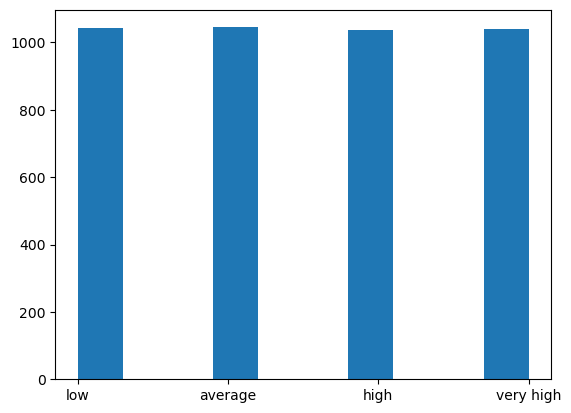

In [36]:
#START CODE HERE
print(np.unique(y, return_counts=True))
plt.hist(y)
#END CODE HERE

### (c) Split the data in 80% training data and 20% test data


Make use of docs `tratrain_test_split?`

In [97]:
# Data Pre-processing Libraries
from sklearn.model_selection import train_test_split

# START CODE HERE 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)
# END CODE HERE 

### (d) Use the `StandardScaler` to standardize the data

Use `plt.boxplot(X_train)` to visualize transformations

In [98]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler

#START CODE HERE


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# plt.boxplot(X_train)
#END CODE HERE

### (e) Model Evaluation

Use the following **classifiers as baseline** for your classification and evaluate the **precision** (macro average: `average='macro'`) on the training and test data for each of these classifiers

- Random Forest classifier (`RandomForestClassifier`) with standard parameters
- k-nearest neighbors classifier (`KNeighborsClassifier`) with `k=3`
  


In [99]:
# Modelling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

classes=['average', 'high', 'low', 'very high']

RandomForest Precision: train: 0.9679179016964986, test: 0.5447374418430794
KNN Precision: train: 0.761006551380883, test: 0.505602233810975


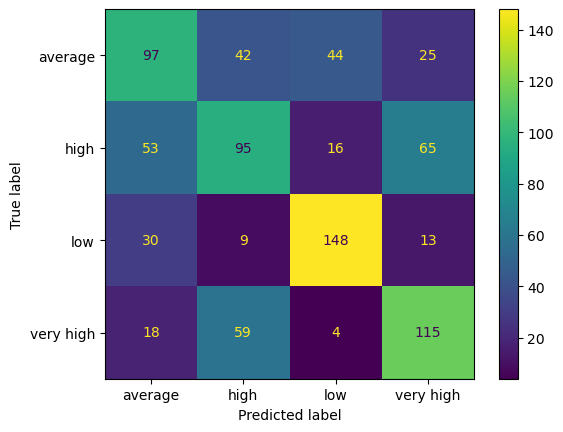

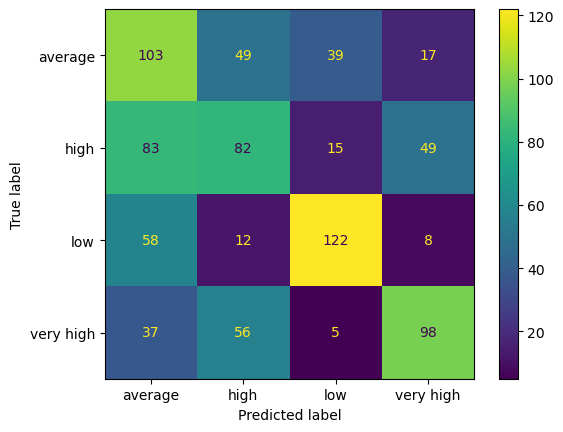

In [100]:
#START CODE HERE

def get_cm(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()


rf_model = RandomForestClassifier(random_state=67).fit(X=X_train, y=y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_train = rf_model.predict(X_train)
rf_precision_train = precision_score(y_train, rf_pred_train, average='macro')
rf_precision = precision_score(y_test, rf_pred, average='macro')

get_cm(y_test, rf_pred, rf_model)
print(f'RandomForest Precision: train: {rf_precision_train}, test: {rf_precision}')

knn_model = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=y_train)
knn_pred = knn_model.predict(X_test)
knn_pred_train = knn_model.predict(X_train)
knn_precision_train = precision_score(y_train, knn_pred_train, average='macro')
knn_precision = precision_score(y_test, knn_pred, average='macro')

print(f'KNN Precision: train: {knn_precision_train}, test: {knn_precision}')

get_cm(y_test, knn_pred, knn_model)

#END CODE HERE

### (f) Plot a confusion matrix for each classifier and interpret the results

Plot a **Confusion Matrix** for each of the two classifiers, e.g. using
   - `cm = confusion_matrix(y_test, y_pred, labels=model.classes_)`
   - ` disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)`
   

Enter your comments in at least two sentences here:
- Both classifier have no problem when predicting the `low` class
- Overall the `RandomForestClassifier` does a slightly better job assigning each class.
- Both classifier seem to have problems to identify the classes `average`, `high` and `very high`

###  (g) Hyperparameter Tuning of random forest

- Tune the hyperparameters a Random Forest Classifier `RandomForestClassifier()` using a 10-fold crossvalidated grid search using `GridSearchCV`. 
- Use the following hyperparameters for your grid search:
    - `params= {'n_estimators':[10,50,100,200], 'max_depth':list(range(1,7))}`
- Use the F1 (`f1_macro`) score as a metric.
- What are the best parameters out of the grid?

In [61]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
params= {'n_estimators':[10,50,100,200],
         'max_depth':list(range(1,7))}

In [62]:
from sklearn.model_selection import cross_val_score

#START CODE HERE

#cross_val_score?
#cross_val_score(rf, X_train, y_train


k_fold = 10
clf = GridSearchCV(rf, params)
clf.fit(X_train, y_train)
score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='f1_macro')
print(score)

clf.best_params_
#END CODE HERE


[0.45032806 0.51838871 0.4687454  0.42478323 0.44790412 0.5332214
 0.47551758 0.44215896 0.44823633 0.47975831]


{'max_depth': 6, 'n_estimators': 200}

### (h) Compute and plot the permutation feature importances of the best tuned random forest classifier
- What are the most important factors for a high salary?


In [68]:
from sklearn.inspection import permutation_importance

#START CODE HERE 


# permutation_importance?
best_estimator = clf.best_estimator_

importances = permutation_importance(best_estimator, X_train, y_train)
argmax = importances['importances_mean'].argmax()
print(f'{df_onehot.columns[argmax]} is the most important feature')
# END CODE HERE




#START CODE HERE 

# get the best model from the grid search CV
best_rf_model = clf.best_estimator_
# compute the feature importances using permutation test
perm_importances = permutation_importance(
    best_rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
# put them in a Series
forest_importances = pd.Series(perm_importances.importances_mean, index=feature_cols)
# sort them (get the indices of the sorted array to be able to apply it on the errors)
sort_index = np.argsort(forest_importances)[::-1]

# plot the importances
fig, ax = plt.subplots()
forest_importances[sort_index].plot.bar(yerr=perm_importances.importances_std[sort_index], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#END CODE HERE


union_yes is the most important feature


###  (i) Hyperparameter Tuning of kNN

- Hypertune a K-nearest neighbour classifier `KNeighborsClassifier()` using a 10-fold crossvalidated grid search. 
- Use the following parameters for your grid search:
    - `params= {'n_neighbors':list(range(20,50))}`
- Use the F1 score (`scoring=f1_macro`) as a metric.
- What are the best parameters for the number of neighbours?

In [64]:
knn=KNeighborsClassifier()
params= {'n_neighbors':list(range(20,50))}

In [65]:
#START CODE HERE


k_fold = 10
clf = GridSearchCV(knn, params)
knn_cls = clf.fit(X_train, y_train)

score = cross_val_score(knn_cls, X_train, y_train, cv=k_fold, scoring='f1_macro')

print(score)

clf.best_params_
#END CODE HERE


[0.41088285 0.46971733 0.3843663  0.41577204 0.43001285 0.48372964
 0.47352155 0.42433243 0.46003794 0.43732336]


{'n_neighbors': 44}

### (j) Compare and discuss the different approaches

- Considering the classifiers (e/f) where the hyperparameters were not tuned and those where the hyperparameters were tuned (g/i), respectively, which classifier would you recommend and why?

Answers:
- ...
- ... 

## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 